In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
import json
mAPs = []
for i in range(7):
    fpath=f"checkpoints/chris/2LAYER/SPEECH/BLSTM_PERFECTMATCH/{i}-fold_test_scores.json"
    with open(fpath,'r') as f:
        data = json.loads(f.read())
        mAP = data["mAP"]
        mAPs.append(mAP)
        print(i,mAP)
print(sum(mAPs)/len(mAPs))

0 0.9577569244515045
1 0.959673170297261
2 0.959673170297261
3 0.959673170297261
4 0.959673170297261
5 0.9446516316800528
6 0.9446516316800528
0.9551075527143791


In [70]:
def plot_df(df,x_axis,color_axis):
    metrics = ["auROC", "f1", "mAP", "acc"]
    fig, ax = plt.subplots(1, len(metrics), figsize=(23, 3))
    for i, metric in enumerate(metrics):
        s = ax[i].scatter(df[x_axis], df[metric], marker="x",cmap="winter",c=df[color_axis])#color="red")
        ax[i].set_ylabel(metric)
        ax[i].set_xlabel(x_axis)
        ax[i].grid(True)
        ax[i].title.set_text(f'Improv. of *{metric}* w/ {x_axis}')
    cb = plt.colorbar(s)
    cb.set_label(color_axis)
    plt.show()


						 Incrimental Improvement on Top of:  TCN SYNCNET SPEECH ang
auROC    0.985044
f1       0.903510
mAP      0.979333
acc      0.949166
Name: 0, dtype: float64


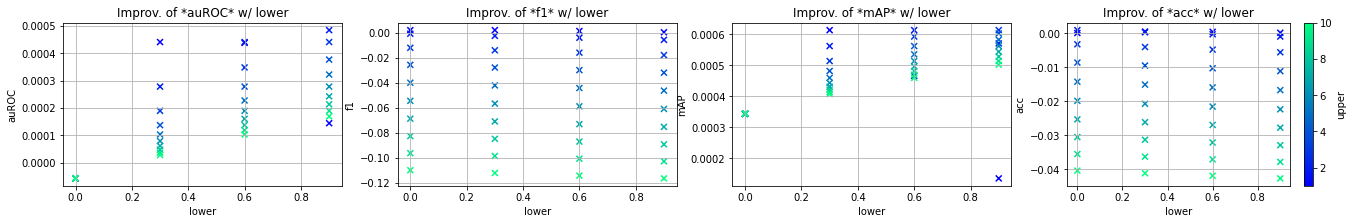

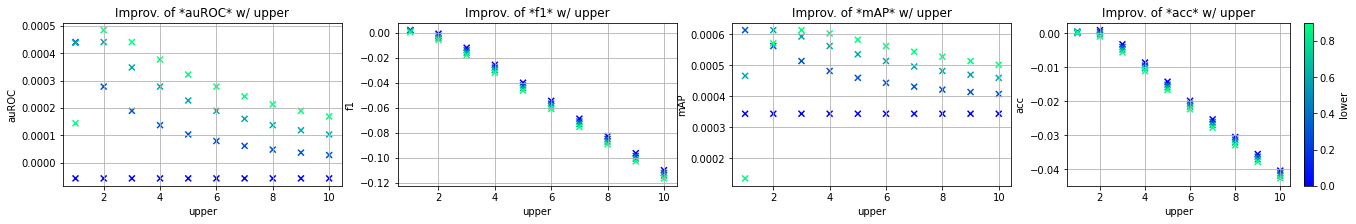

In [73]:
def load_df(model,feature,label,gaze_feat, model_trainer=""):
    print("\n\t\t\t\t\t\t Incrimental Improvement on Top of: ",model,feature,label,gaze_feat)
    df = pd.read_csv(f"metrics/{model}_{feature}_{label}_{gaze_feat}_metrics{model_trainer}.csv")
    baseline = df.iloc[0]
    print(baseline[["auROC", "f1", "mAP", "acc"]])
    df = df.iloc[1:]
    if gaze_feat=="ang":
        plot_df(df,"lower","upper")
        plot_df(df,"upper","lower")
    if gaze_feat=="at":
        plot_df(df,"base","perc")
        plot_df(df,"perc","base")

    return df, baseline
    
_,_ = load_df("TCN","SYNCNET","SPEECH","ang")


						 Incrimental Improvement on Top of:  TCN SYNCNET SPEECH at
auROC    0.985044
f1       0.903510
mAP      0.979333
acc      0.949166
Name: 0, dtype: float64


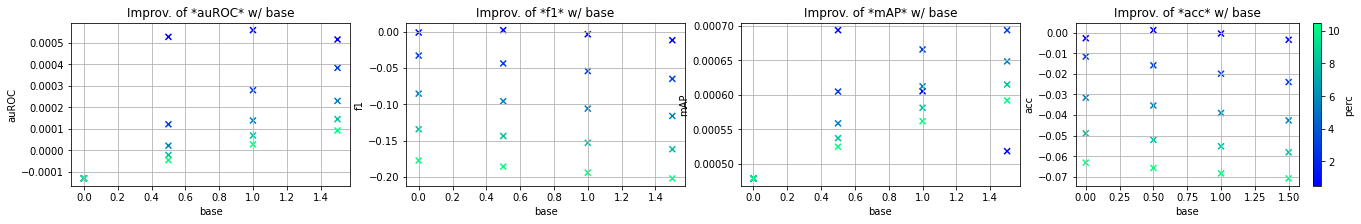

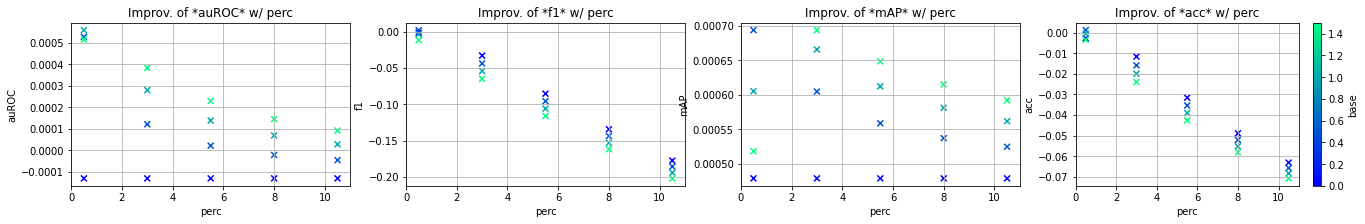


						 Incrimental Improvement on Top of:  TCN SYNCNET SPEECH ang
auROC    0.985044
f1       0.903510
mAP      0.979333
acc      0.949166
Name: 0, dtype: float64


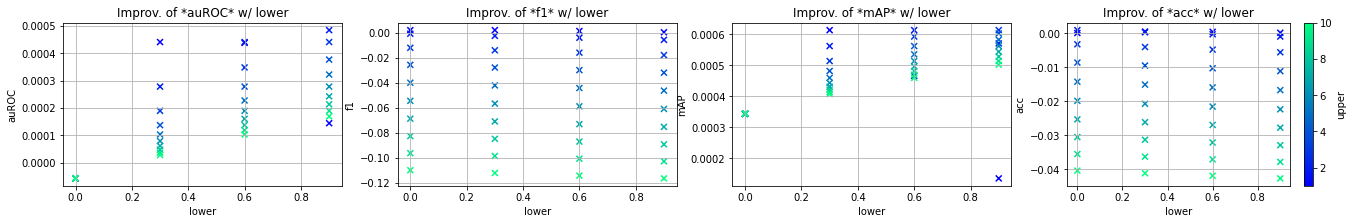

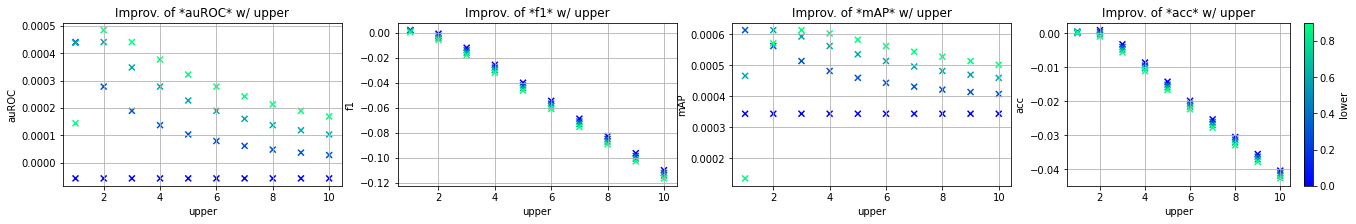


						 Incrimental Improvement on Top of:  TCN PERFECTMATCH SPEECH at
auROC    0.988619
f1       0.918375
mAP      0.984348
acc      0.956366
Name: 0, dtype: float64


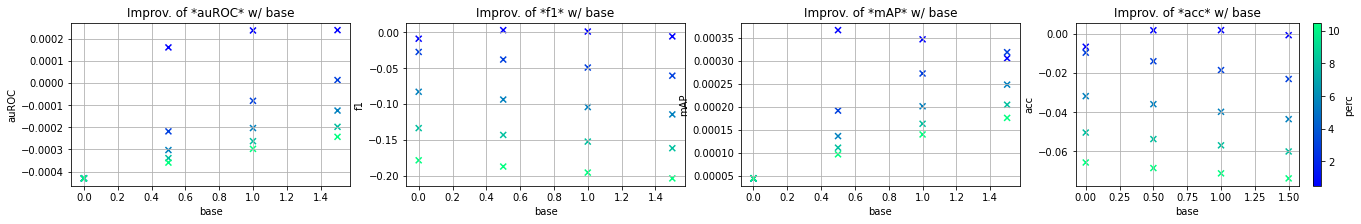

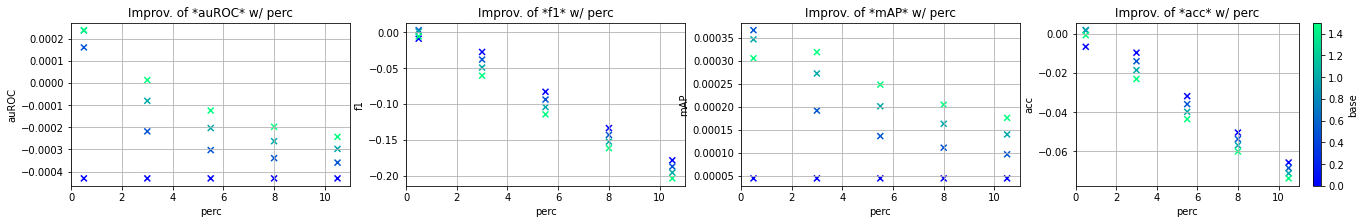


						 Incrimental Improvement on Top of:  TCN PERFECTMATCH SPEECH ang
auROC    0.988619
f1       0.918375
mAP      0.984348
acc      0.956366
Name: 0, dtype: float64


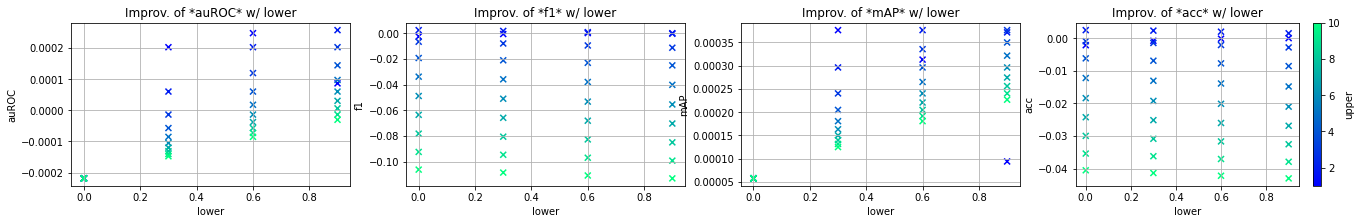

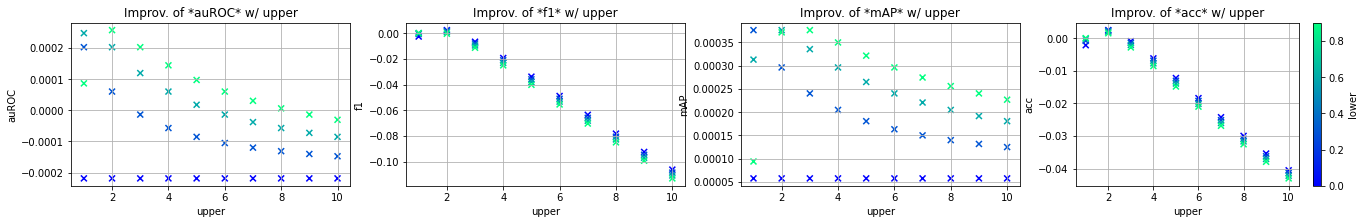


						 Incrimental Improvement on Top of:  BLSTM SYNCNET SPEECH at
auROC    0.985611
f1       0.903331
mAP      0.980728
acc      0.950764
Name: 0, dtype: float64


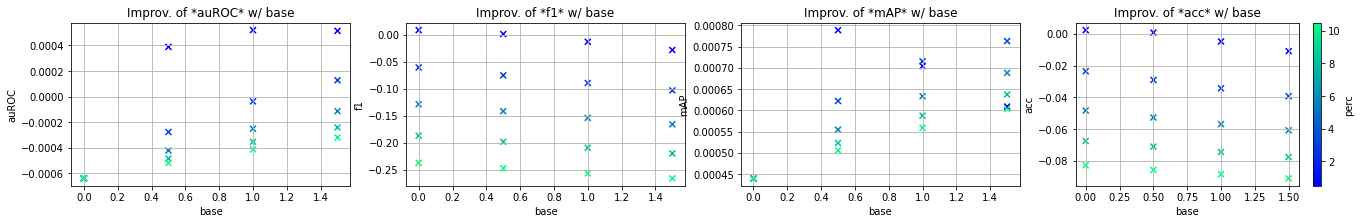

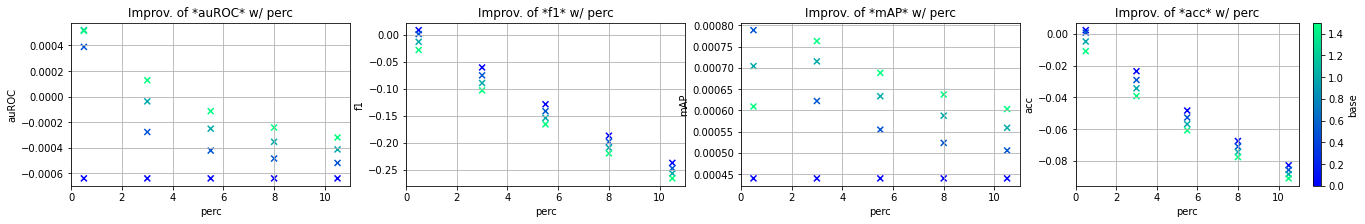


						 Incrimental Improvement on Top of:  BLSTM SYNCNET SPEECH ang
auROC    0.985611
f1       0.903331
mAP      0.980728
acc      0.950764
Name: 0, dtype: float64


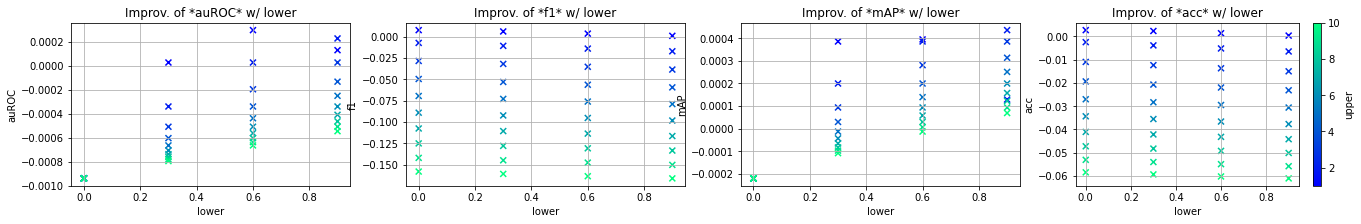

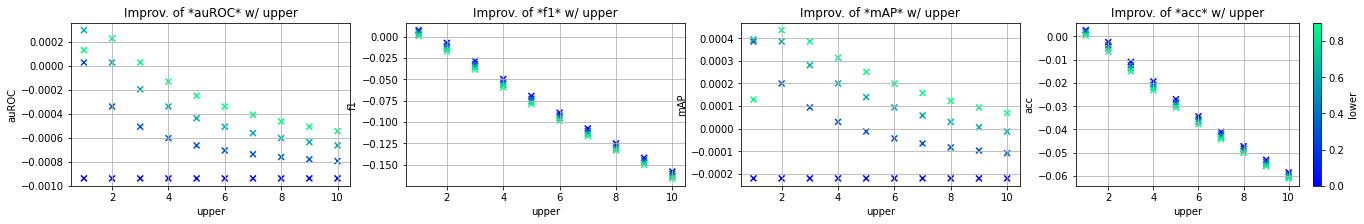


						 Incrimental Improvement on Top of:  BLSTM PERFECTMATCH SPEECH at
auROC    0.989471
f1       0.920492
mAP      0.985713
acc      0.959084
Name: 0, dtype: float64


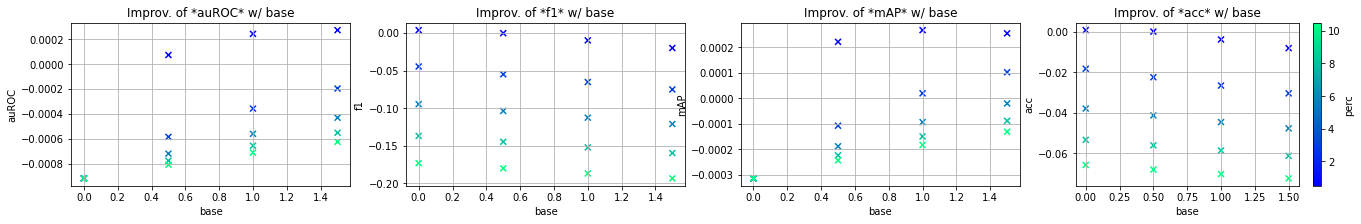

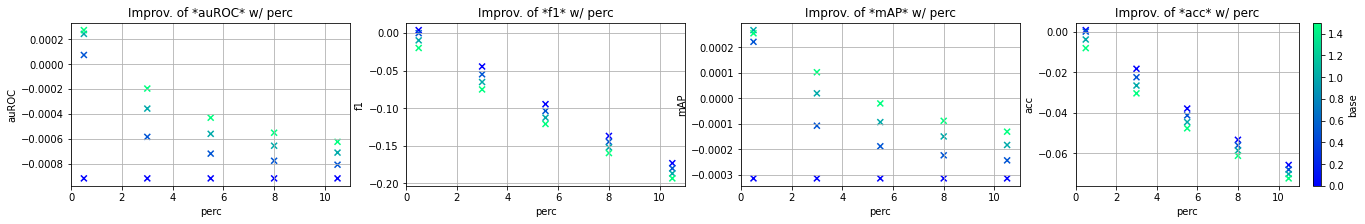


						 Incrimental Improvement on Top of:  BLSTM PERFECTMATCH SPEECH ang
auROC    0.989471
f1       0.920492
mAP      0.985713
acc      0.959084
Name: 0, dtype: float64


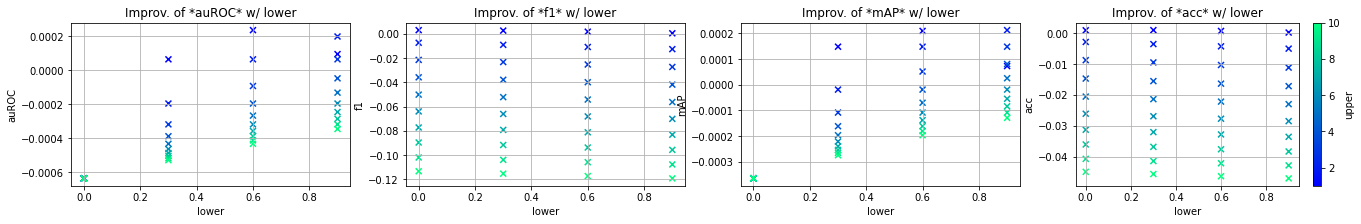

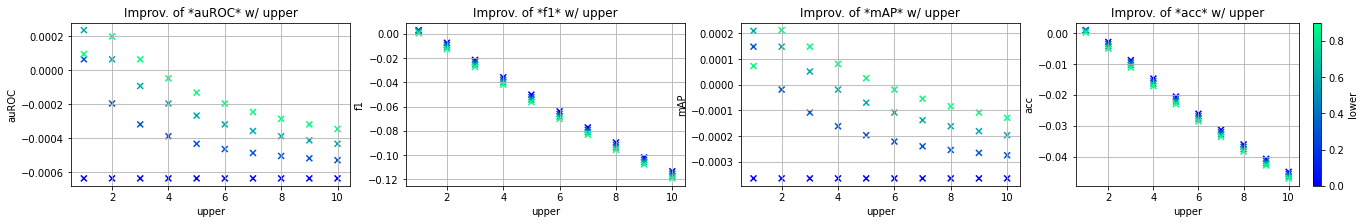


						 Incrimental Improvement on Top of:  TCN SYNCNET TURN at
auROC    0.983902
f1       0.904546
mAP      0.976855
acc      0.949619
Name: 0, dtype: float64


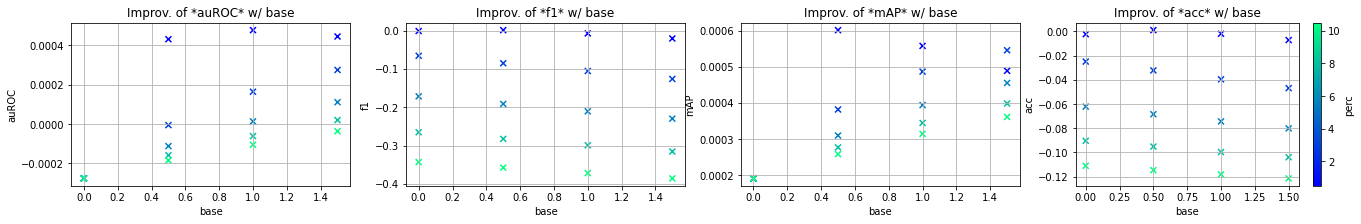

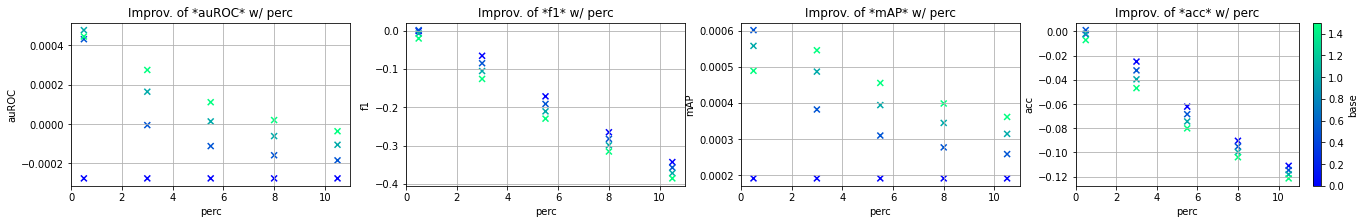


						 Incrimental Improvement on Top of:  TCN SYNCNET TURN ang
auROC    0.983902
f1       0.904546
mAP      0.976855
acc      0.949619
Name: 0, dtype: float64


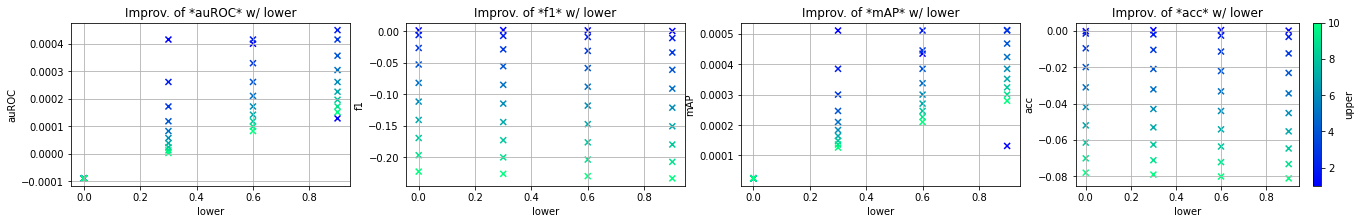

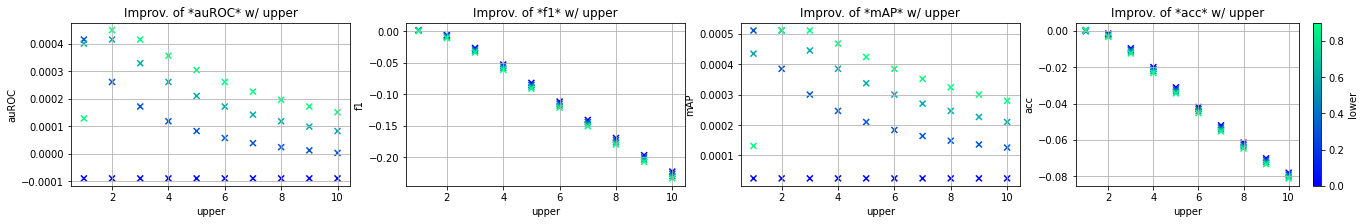


						 Incrimental Improvement on Top of:  TCN PERFECTMATCH TURN at
auROC    0.975917
f1       0.883786
mAP      0.966202
acc      0.938464
Name: 0, dtype: float64


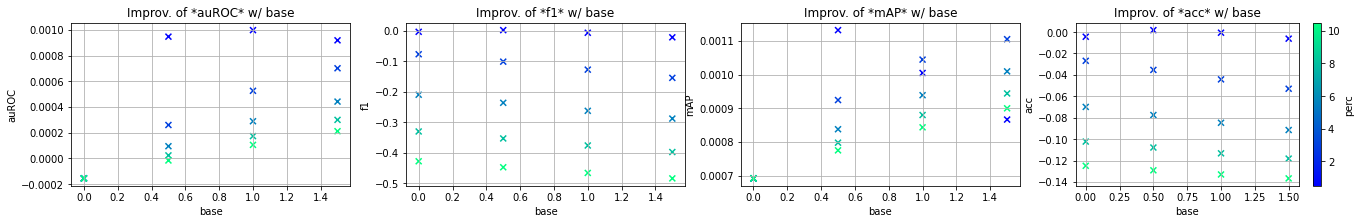

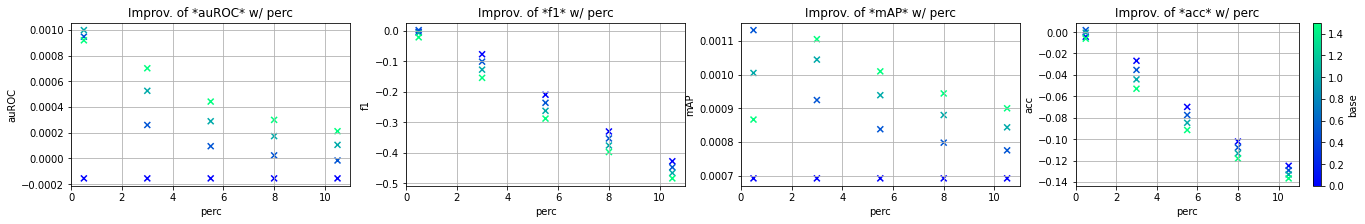


						 Incrimental Improvement on Top of:  TCN PERFECTMATCH TURN ang
auROC    0.975917
f1       0.883786
mAP      0.966202
acc      0.938464
Name: 0, dtype: float64


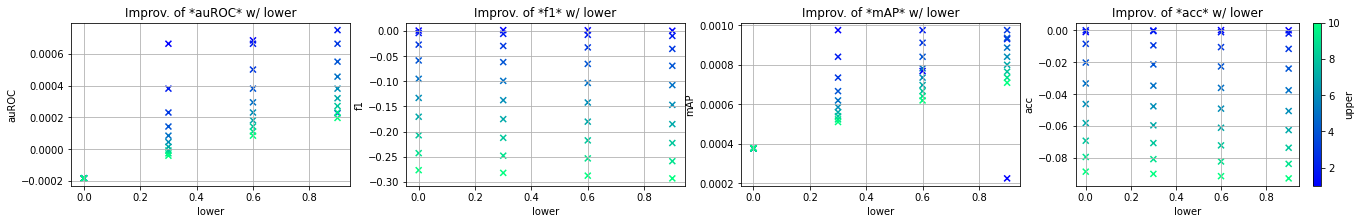

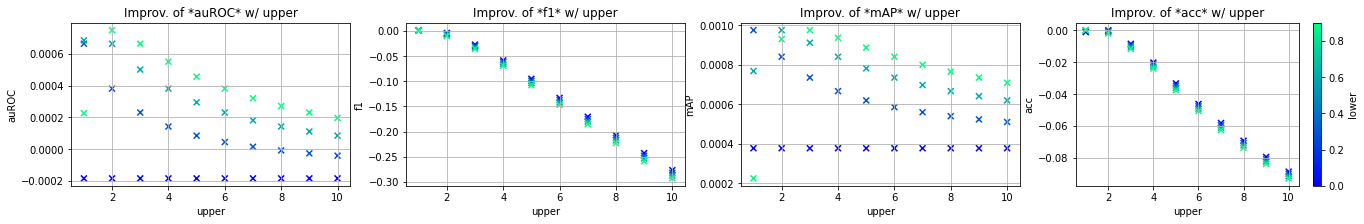


						 Incrimental Improvement on Top of:  BLSTM SYNCNET TURN at
auROC    0.972580
f1       0.876865
mAP      0.962892
acc      0.935141
Name: 0, dtype: float64


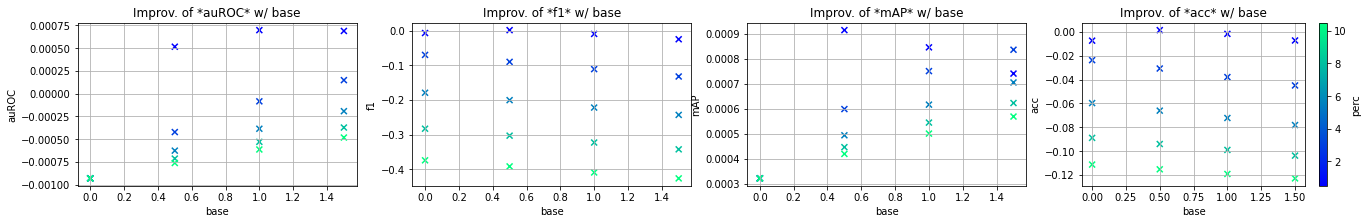

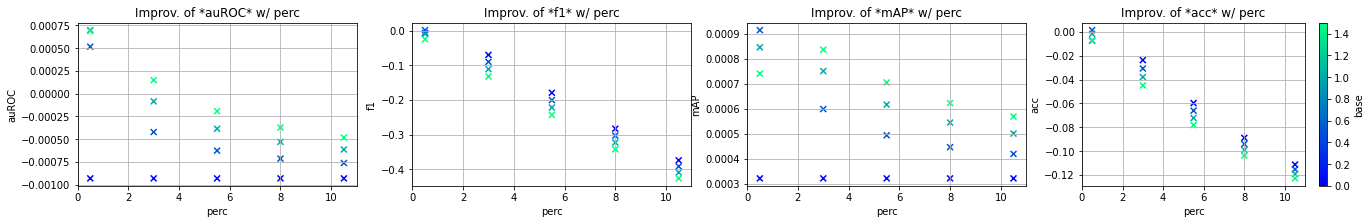


						 Incrimental Improvement on Top of:  BLSTM SYNCNET TURN ang
auROC    0.972580
f1       0.876865
mAP      0.962892
acc      0.935141
Name: 0, dtype: float64


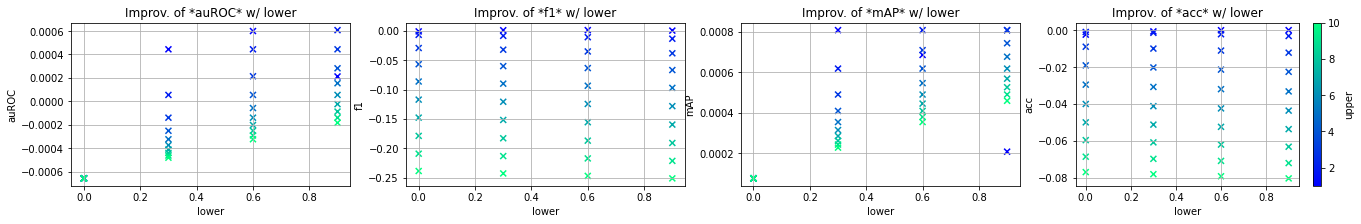

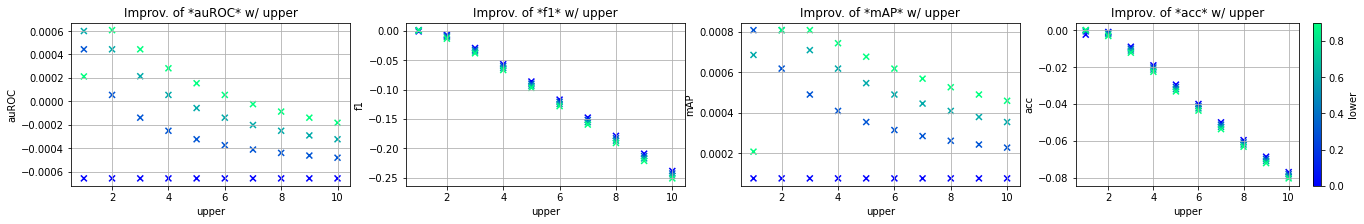


						 Incrimental Improvement on Top of:  BLSTM PERFECTMATCH TURN at
auROC    0.978698
f1       0.885928
mAP      0.970621
acc      0.941761
Name: 0, dtype: float64


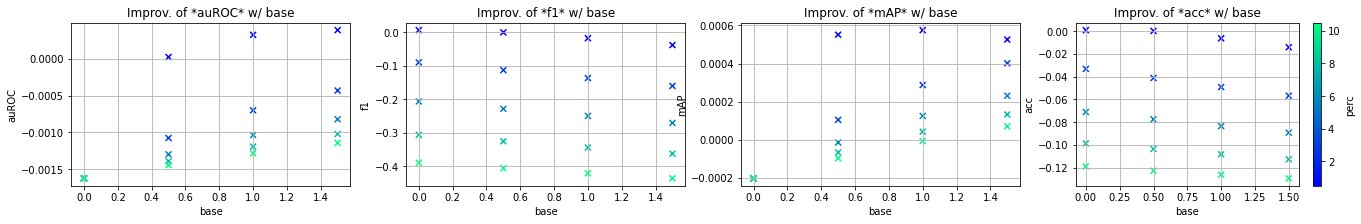

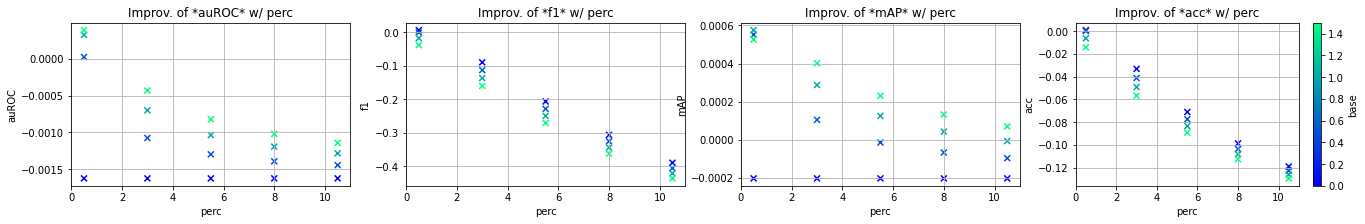


						 Incrimental Improvement on Top of:  BLSTM PERFECTMATCH TURN ang
auROC    0.978698
f1       0.885928
mAP      0.970621
acc      0.941761
Name: 0, dtype: float64


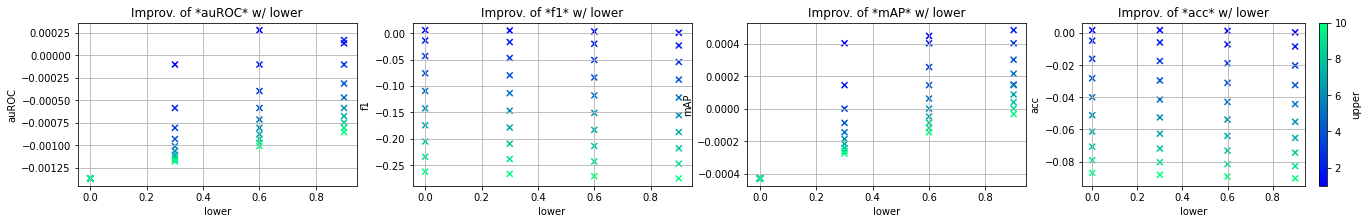

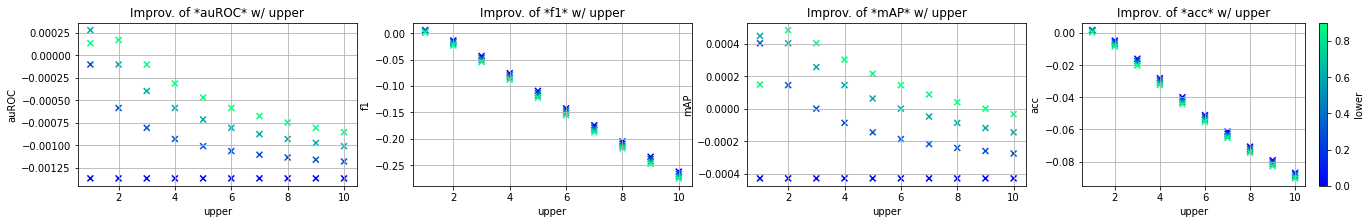

In [75]:
for labels in ["SPEECH", "TURN"]:
    for model in ["TCN", "BLSTM"]:
        for features in ["SYNCNET","PERFECTMATCH"]:
            for gaze in ["at","ang"]:
                load_df(model,features,labels,gaze)
# _,_ = load_df("TCN","SYNCNET","SPEECH","at")


						 Incrimental Improvement on Top of:  TCN SYNCNET SPEECH at
auROC    0.654749
f1       0.458272
mAP      0.607403
acc      0.504375
Name: 0, dtype: float64


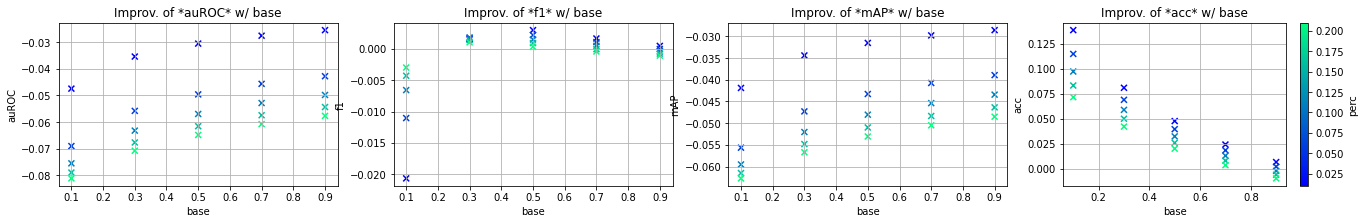

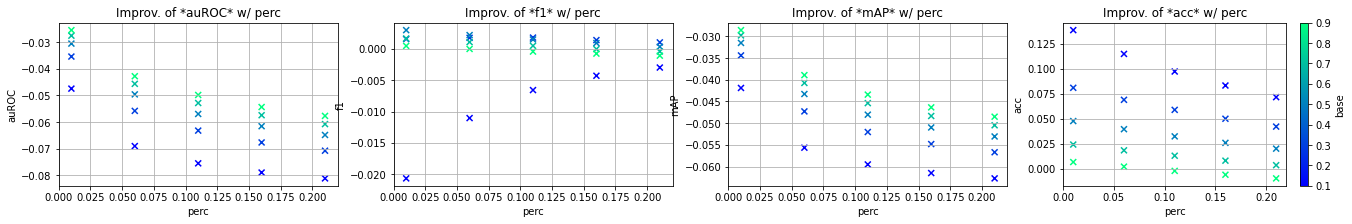


						 Incrimental Improvement on Top of:  TCN SYNCNET SPEECH ang
auROC    0.654749
f1       0.458272
mAP      0.607403
acc      0.504375
Name: 0, dtype: float64


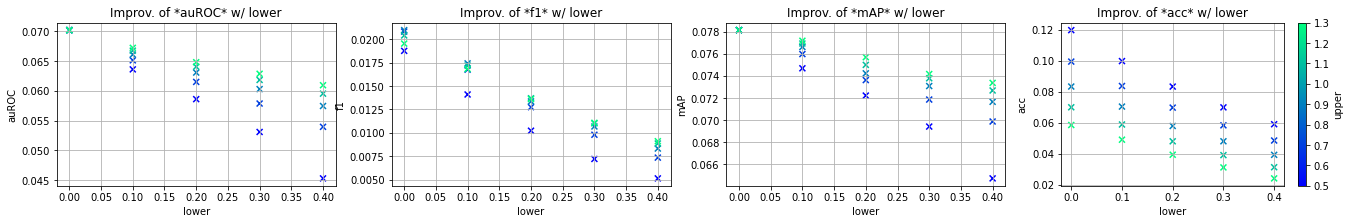

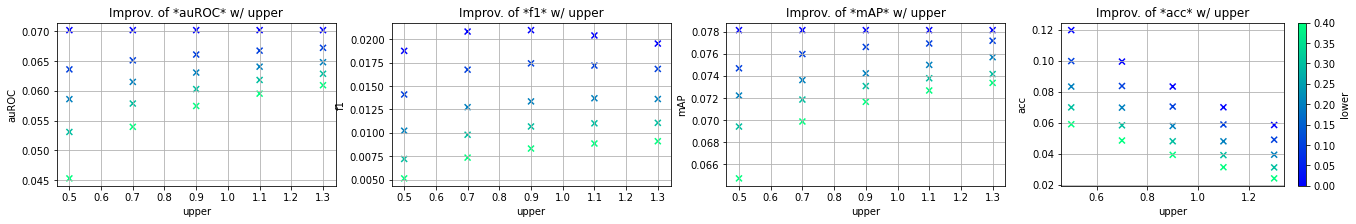


						 Incrimental Improvement on Top of:  TCN PERFECTMATCH SPEECH at
auROC    0.673041
f1       0.459885
mAP      0.631366
acc      0.470005
Name: 0, dtype: float64


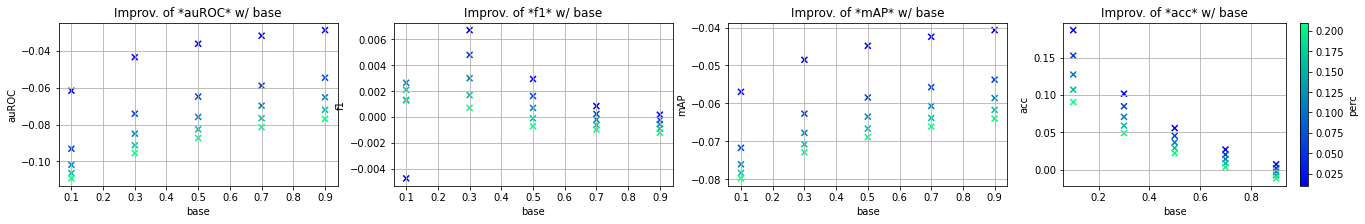

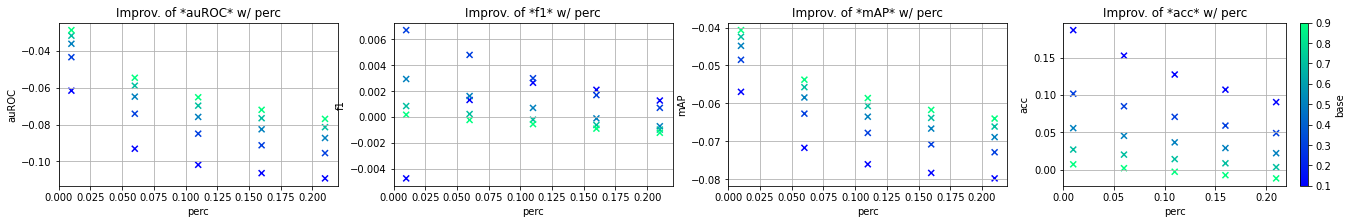


						 Incrimental Improvement on Top of:  TCN PERFECTMATCH SPEECH ang
auROC    0.673041
f1       0.459885
mAP      0.631366
acc      0.470005
Name: 0, dtype: float64


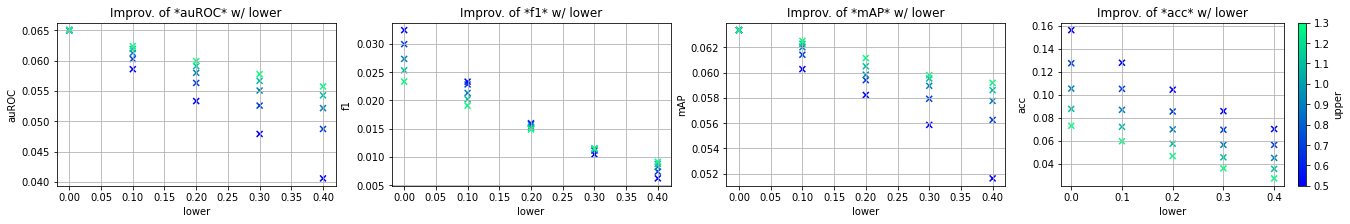

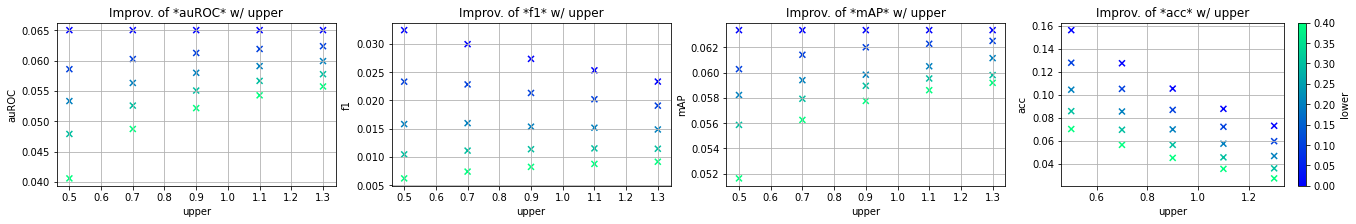


						 Incrimental Improvement on Top of:  BLSTM SYNCNET SPEECH at
auROC    0.662173
f1       0.447284
mAP      0.637353
acc      0.481277
Name: 0, dtype: float64


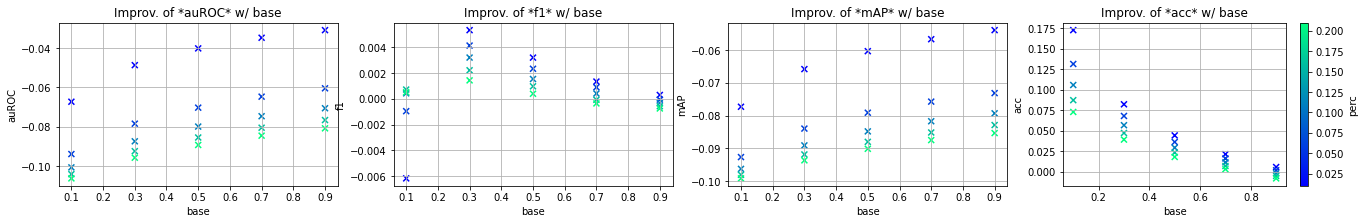

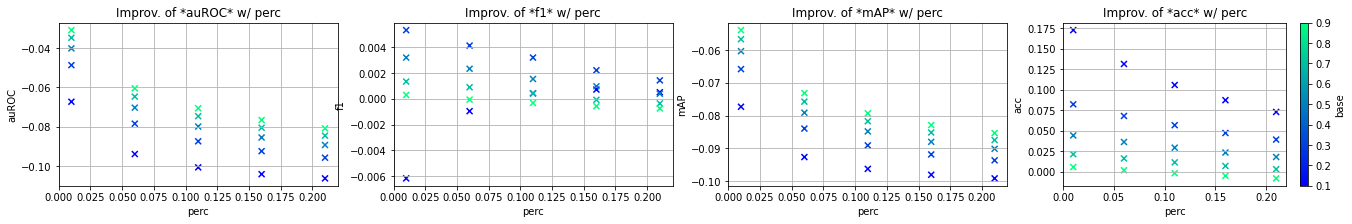


						 Incrimental Improvement on Top of:  BLSTM SYNCNET SPEECH ang
auROC    0.662173
f1       0.447284
mAP      0.637353
acc      0.481277
Name: 0, dtype: float64


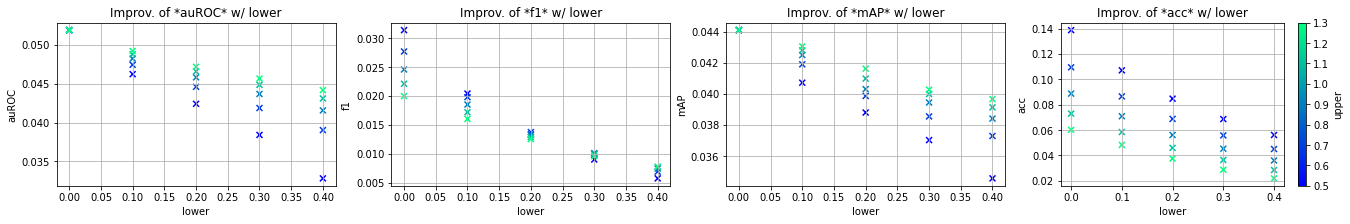

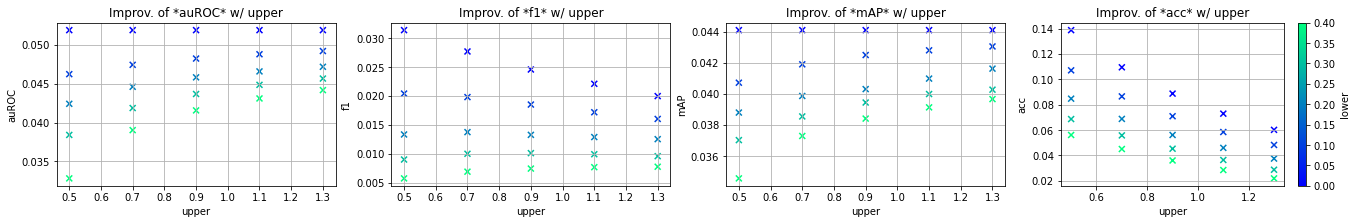


						 Incrimental Improvement on Top of:  BLSTM PERFECTMATCH SPEECH at
auROC    0.689606
f1       0.449786
mAP      0.683949
acc      0.460063
Name: 0, dtype: float64


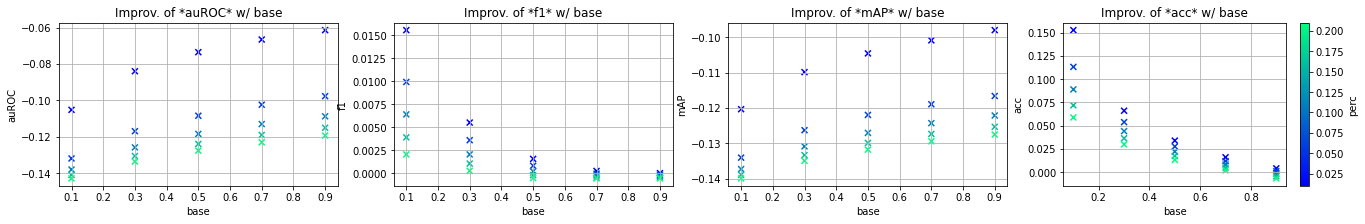

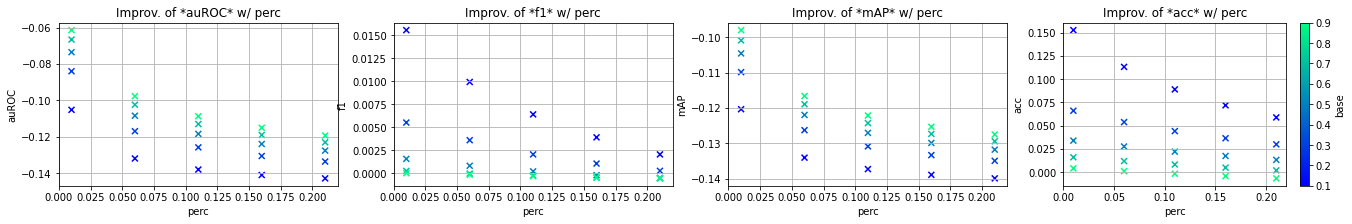


						 Incrimental Improvement on Top of:  BLSTM PERFECTMATCH SPEECH ang
auROC    0.689606
f1       0.449786
mAP      0.683949
acc      0.460063
Name: 0, dtype: float64


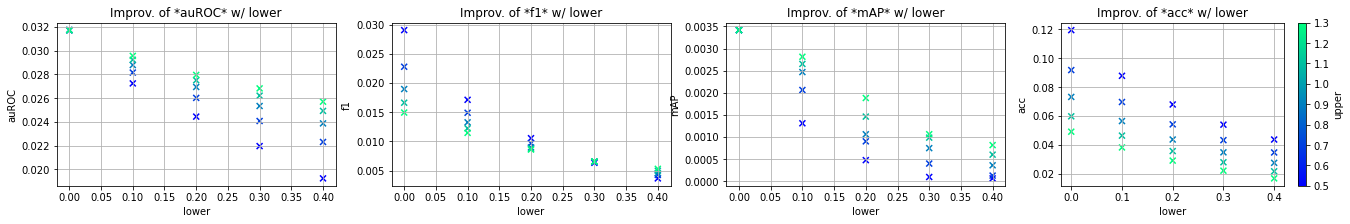

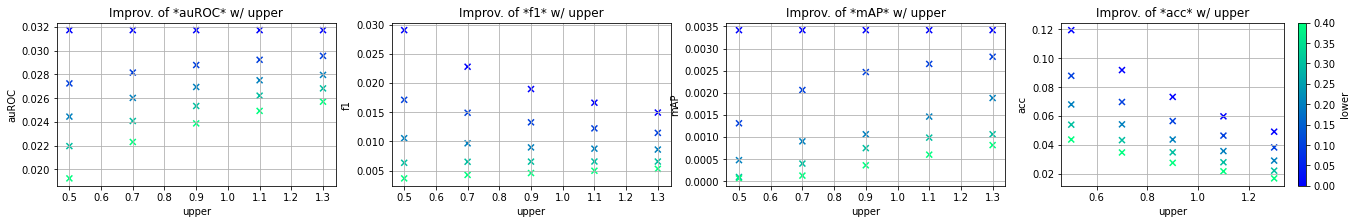

In [80]:
# Original confidence scores:
# Syncnet (acc: 0.6175, f1: 0.54605, auroc: 0.6873, mAP: 0.6106)

# Perfectmatch (acc: 0.7210, f1: 0.63594, auroc: 0.9070, mAP: 0.8744)

for model in ["TCN","BLSTM"]:
    for labels in ["SPEECH"]:
        for features in ["SYNCNET","PERFECTMATCH"]:
            for gaze in ["at","ang"]:
                load_df(model,features,labels,gaze, model_trainer="kalin")